In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
'''
The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class.
The dataset is divided into 50,000 training images and 10,000 testing images.
The classes are mutually exclusive and there is no overlap between them.
'''
(train_images_1, train_labels_1), (test_images_1, test_labels_1) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print('X_train: ' + str(train_images_1.shape))
print('Y_train: ' + str(train_labels_1.shape))
print('X_test:  ' + str(test_images_1.shape))
print('Y_test:  ' + str(test_labels_1.shape))

X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


In [ ]:
'''
MNIST contains 70,000 images of handwritten digits. Each observation is a 28x28 pixel gray-scale image
that depicts a handwritten version of 1 of the 10 possible digits (0-9).
'''
(train_images_2, train_labels_2), (test_images_2, test_labels_2) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print('X_train: ' + str(train_images_2.shape))
print('Y_train: ' + str(train_labels_2.shape))
print('X_test:  ' + str(test_images_2.shape))
print('Y_test:  ' + str(test_labels_2.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
# Normalize pixel values to be between 0 and 1 for the two datasets
train_images_1, test_images_1 = train_images_1 / 255.0, test_images_1 / 255.0

train_images_2, test_images_2 = train_images_2 / 255.0, test_images_2 / 255.0

# Peforming reshaping operation for MNIST dataset to add a channel to the dataset to indicate the color which is 1 (Grayscale)
train_images_2 = train_images_2.reshape(train_images_2.shape[0], 28, 28, 1)
test_images_2= test_images_2.reshape(test_images_2.shape[0], 28, 28, 1)

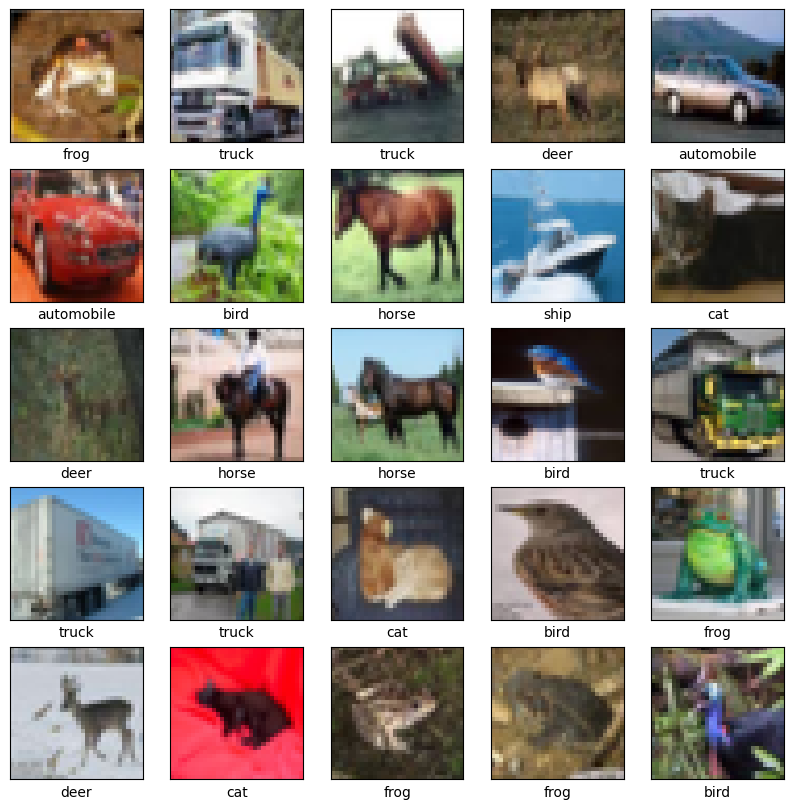

In [ ]:
# For CIFAR10 dataset, let's plot the first 25 images from the training set and display the class name below each image.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_1[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels_1[i][0]])
plt.show()

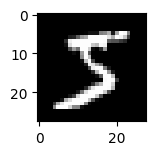

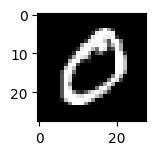

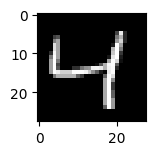

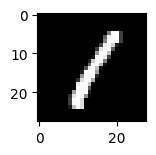

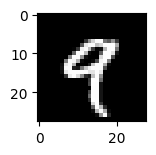

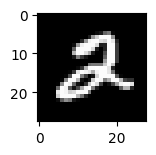

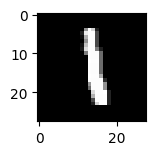

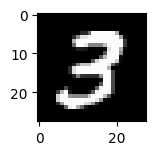

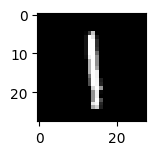

In [ ]:
# For MNIST dataset, let's plot the first 9 numbers from the training set
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(train_images_2[i], cmap=plt.get_cmap('gray'))
  plt.show()

In [ ]:
'''
Create the convolutional base
The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.
As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size where color_channels refers to (R,G,B).
In this example, we will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images.
You can do this by passing the argument input_shape to our first layer.
'''

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


In [ ]:
'''
Add Dense layers on top
To complete our model, we will feed the last output tensor from the convolutional base (of shape (4, 4, 64))
into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D),
while the current output is a 3D tensor. First, we will flatten (or unroll) the 3D output to 1D,
then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs (as the mnist dataset has 10 numbers) and a softmax activation.
'''

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
#Here's the complete architecture of our model.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
#As we can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

In [ ]:
#Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images_1, train_labels_1, epochs=10,
                    validation_data=(test_images_1, test_labels_1))

Epoch 1/10
1563/1563 [==============================] - 72s 45ms/step - loss: 1.5333 - accuracy: 0.4397 - val_loss: 1.3364 - val_accuracy: 0.5204
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1756 - accuracy: 0.5822 - val_loss: 1.1287 - val_accuracy: 0.6043
Epoch 3/10
1563/1563 [==============================] - 83s 53ms/step - loss: 1.0120 - accuracy: 0.6427 - val_loss: 1.0600 - val_accuracy: 0.6262
Epoch 4/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9033 - accuracy: 0.6804 - val_loss: 0.9423 - val_accuracy: 0.6752
Epoch 5/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8219 - accuracy: 0.7123 - val_loss: 0.9041 - val_accuracy: 0.6874
Epoch 6/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.7620 - accuracy: 0.7310 - val_loss: 0.8582 - val_accuracy: 0.7064
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7041 - accuracy: 0.7535 - val_loss: 0.8380 -

313/313 - 3s - loss: 0.8357 - accuracy: 0.7263 - 3s/epoch - 11ms/step


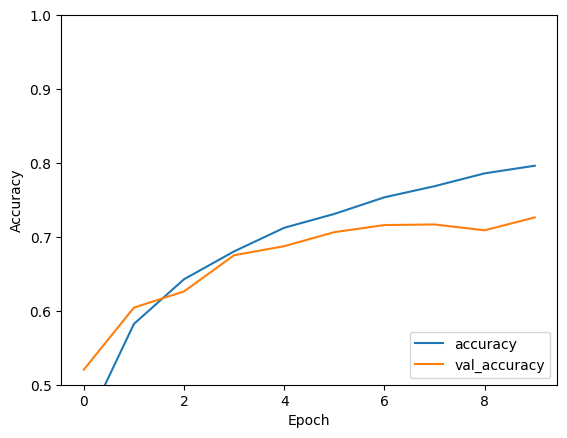

In [ ]:
#Evaluate the model (Metric: Accuracy)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_1,  test_labels_1, verbose=2)

In [ ]:
print(test_acc)

0.7263000011444092


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix , precision_score , recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# Create the confusion matrix
predictions = model.predict(test_images_1)
predictedLabels = np.argmax(predictions, axis=1)
conf_mat = confusion_matrix(test_labels_1, predictedLabels)

313/313 [==============================] - 7s 21ms/step


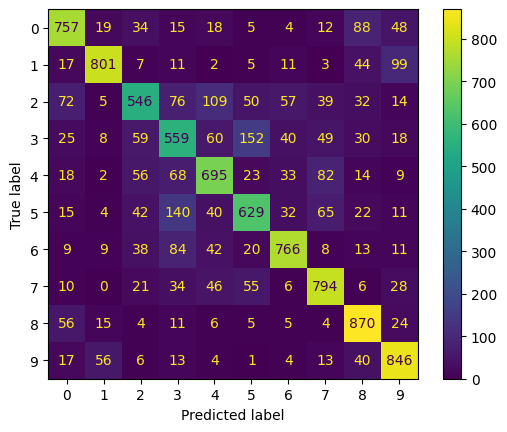

In [ ]:
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [ ]:
#Getting the precision, Recall and F1_score Metrics
from sklearn.metrics import classification_report
print(classification_report(test_labels_1, predictedLabels))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1000
           1       0.87      0.80      0.83      1000
           2       0.67      0.55      0.60      1000
           3       0.55      0.56      0.56      1000
           4       0.68      0.69      0.69      1000
           5       0.67      0.63      0.65      1000
           6       0.80      0.77      0.78      1000
           7       0.74      0.79      0.77      1000
           8       0.75      0.87      0.81      1000
           9       0.76      0.85      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.72     10000
weighted avg       0.73      0.73      0.72     10000



In [ ]:
# Building the Model Architecture for MNIST dataset
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(48, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
#Here's the complete architecture of our model.
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 48)          38448     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 4, 4, 48)          0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 768)               0         
                                                                 
 dense_8 (Dense)             (None, 256)              

In [ ]:
#Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images_2, train_labels_2, epochs=10,
                    validation_data=(test_images_2, test_labels_2))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 78s 40ms/step - loss: 0.4888 - accuracy: 0.8401 - val_loss: 0.1697 - val_accuracy: 0.9435
Epoch 2/10
1875/1875 [==============================] - 75s 40ms/step - loss: 0.1425 - accuracy: 0.9551 - val_loss: 0.1059 - val_accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0968 - accuracy: 0.9699 - val_loss: 0.0739 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0746 - accuracy: 0.9760 - val_loss: 0.0695 - val_accuracy: 0.9764
Epoch 5/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.0620 - accuracy: 0.9809 - val_loss: 0.0635 - val_accuracy: 0.9809
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0514 - accuracy: 0.9836 - val_loss: 0.0445 - val_accuracy: 0.9842
Epoch 7/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0492 - val_accura

313/313 - 3s - loss: 0.0417 - accuracy: 0.9877 - 3s/epoch - 8ms/step


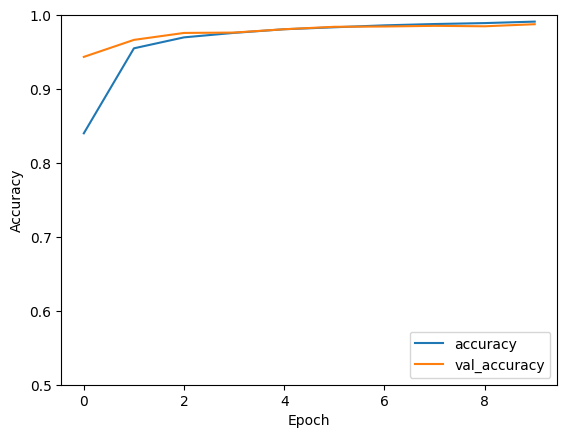

In [ ]:
#Evaluate the model (Metric: Accuracy)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images_2,  test_labels_2, verbose=2)

313/313 [==============================] - 3s 9ms/step


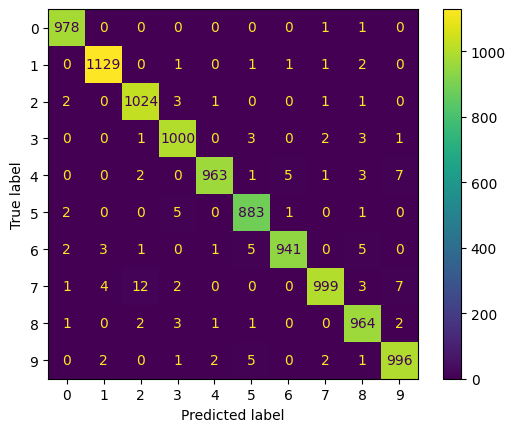

In [ ]:
# Create the confusion matrix
predictions = model.predict(test_images_2)
predictedLabels = np.argmax(predictions, axis=1)
conf_mat = confusion_matrix(test_labels_2, predictedLabels)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

In [ ]:
#Getting the precision, Recall and F1_score Metrics
from sklearn.metrics import classification_report
print(classification_report(test_labels_2, predictedLabels))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
# Noticed an increase in the evaluation metrics scores when the filters applied increased

In [ ]:
'''
Notes:
prec_score = precision_score(test_labels_1, predictedLabels, average='weighted')
print(prec_score)
'''